In [1]:
from new_animal import *
from New_map_generator import *
import numpy as np

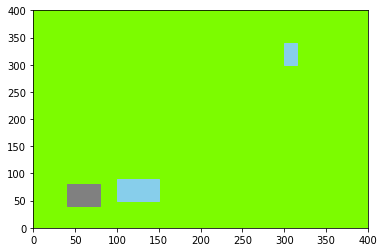

In [2]:
dimensions = [400, 400]
mountains = [[40, 40, 40, 40]]
lakes = [[300, 300, 15, 60], [100, 50, 50, 50]]

new_map = Map(dimensions, mountains, lakes)

In [3]:
lion = Lion(np.random.randint(0, 400, 2), 0, new_map)

In [4]:
zebra1 = Zebra(np.random.randint(0, 400, 2), 1, new_map)

In [5]:
zebra2 = Zebra(np.random.randint(0, 400, 2), 2, new_map)

In [6]:
all_animal = [lion, zebra1, zebra2]

In [7]:
lion(all_animal)
zebra1(all_animal)
zebra2(all_animal)

In [8]:
lion.execute_action()
lion.__dict__

{'id': 0,
 'location': array([327, 285]),
 'type': 'lion',
 'vision': 30,
 'health': 96,
 'state': {'hunger': 96, 'thirst': 96, 'sleep': 96},
 'isDead': False,
 'respawn_time': 10,
 'walk_stride': 1,
 'run_stride': 4,
 'move_angle': 3.625524655271965,
 'map': <New_map_generator.Map at 0xa1b9c9f60>,
 'all_animal': [<new_animal.Lion at 0xa1c1de978>,
 'model': <new_model.FSMLionModel at 0xa1c1de550>,
 'action_dict': {0: 'drink', 1: 'eat', 2: 'sleep', 3: 'walk', 4: 'run'},
 'action': 'walk'}

In [14]:
new_map.find_closest_lake(zebra1.location)

'POINT (100 100)'

In [15]:
zebra1.location

array([ 82, 169])

In [11]:
from utilities import *

In [12]:
distance(zebra1.location, lion.location)

271.07379069175977

In [25]:
from shapely.geometry import Polygon, Point, LinearRing


In [28]:
min_location = lakes[0]
poly = Polygon([(min_location[0], min_location[1]),
                       (min_location[0] + min_location[2], min_location[1]),
                       (min_location[0], min_location[1] + min_location[3]),
                       (min_location[0] + min_location[2], min_location[1] + min_location[3])])
        # Shapely point for current location
point = Point(lion.location[0], lion.location[1])

In [30]:
pol_ext = LinearRing(poly.exterior.coords)
d = pol_ext.project(point)
p = pol_ext.interpolate(d)
p.wkt

'POINT (315 300)'